In [68]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class Model(nn.Module):
    def __init__(self, input_dim, middle_dim, output_dim):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, middle_dim),
            nn.ReLU(),
            nn.Linear(middle_dim, middle_dim),
            nn.ReLU(),
            nn.Linear(middle_dim, output_dim),
        )
    
    def forward(self, x):
        out = self.model(x)
        return out

# Create our model
model = Model(1, 512, 1)

# Define loss function and optimizer
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [69]:
X = np.random.rand(10**5) * 2 * np.pi
y = np.sin(X).ravel()

# These are dataloaders which are responsible for splitting the test and train data into batches
# that can be fed into the model for training
X_train, X_test, y_train, y_test = map(torch.tensor, train_test_split(X, y, test_size=0.2))
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=64, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(TensorDataset(X_test.unsqueeze(1), y_test.unsqueeze(1)), batch_size=64, pin_memory=True, shuffle=True)

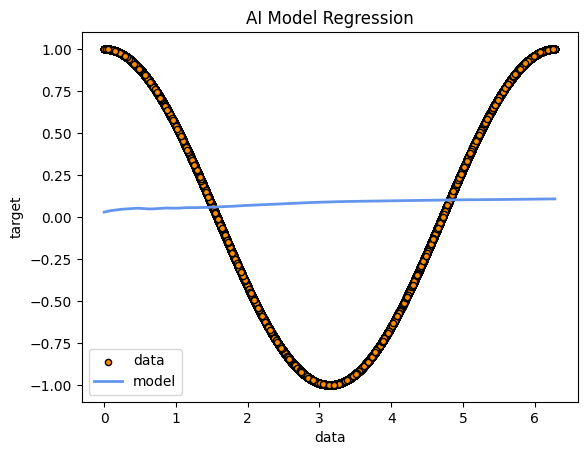

In [70]:
lin_test = np.arange(0.0, 2*np.pi, 0.01)[:, np.newaxis]
with torch.no_grad():
    y_1 = model(torch.from_numpy(lin_test).float())

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(lin_test, y_1, color="cornflowerblue", label="model", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("AI Model Regression")
plt.legend()
plt.show()

epoch 0, loss 0.030734550207853317
epoch 1, loss 0.0051610455848276615
epoch 2, loss 0.0025882325135171413
epoch 3, loss 0.002629208378493786
epoch 4, loss 0.0028390735387802124
epoch 5, loss 0.004015320912003517
epoch 6, loss 0.0008952771313488483
epoch 7, loss 0.0013570435112342238
epoch 8, loss 0.0022407083306461573
epoch 9, loss 0.0025314383674412966


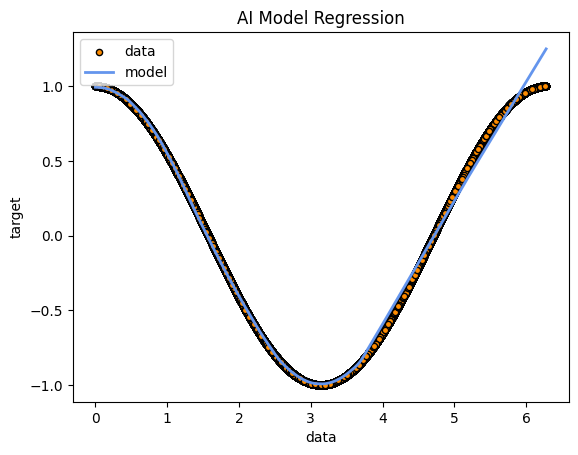

In [71]:
for epoch in range(10):
    for train, expected in train_dataloader:
        train = train.type(torch.float32)
        expected = expected.type(torch.float32)

        optimizer.zero_grad()

        # Feed the data into our model
        y_pred = model(train)

        # Calculate the loss (how far off the model is from the expected result)
        # then backpropagate the error to adjust the model's weights
        loss = criterion(y_pred, expected)
        loss.backward()
        optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

lin_test = np.arange(0.0, 2*np.pi, 0.01)[:, np.newaxis]
with torch.no_grad():
    y_1 = model(torch.from_numpy(lin_test).float())

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(lin_test, y_1, color="cornflowerblue", label="model", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("AI Model Regression")
plt.legend()
plt.show()